In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Import Warnings to suppress unnecessary warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset/Car Sales.xlsx - car_data.csv")

In [3]:
df.shape

(23906, 16)

In [21]:
style_count = df['Gender'].value_counts().reset_index(name='Count')

style_count.columns = ['Gender', 'Count']

# Hiển thị bảng
style_count

,Gender,Count
0,Male,18798
1,Female,5108


In [22]:

style_count = df['Body Style'].value_counts().reset_index(name='Count')

# Đổi tên cột 'index' thành 'Body Style'
style_count.columns = ['Body Style', 'Count']

# Hiển thị bảng
style_count

,Body Style,Count
0,SUV,6374
1,Hatchback,6128
2,Sedan,4488
3,Passenger,3945
4,Hardtop,2971


# 1.	Thống kê và vẽ biểu đồ cho 1 biến phân loại (giải thích ý nghĩa)

<Axes: xlabel='Gender', ylabel='count'>

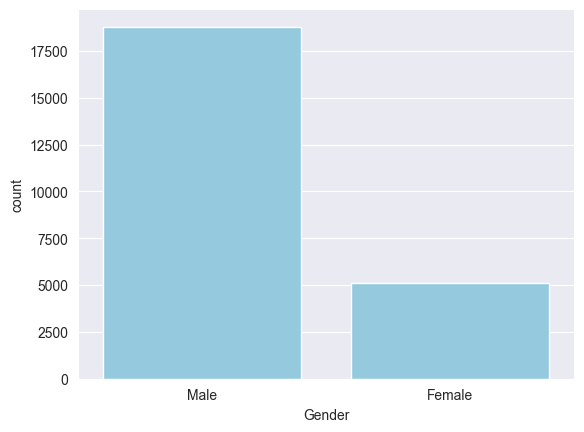

In [4]:
sns.countplot(data=df,x='Gender',color='skyblue')

# 2. Thống kê và vẽ biểu đồ cho 2 biến phân loại (giải thích ý nghĩa)


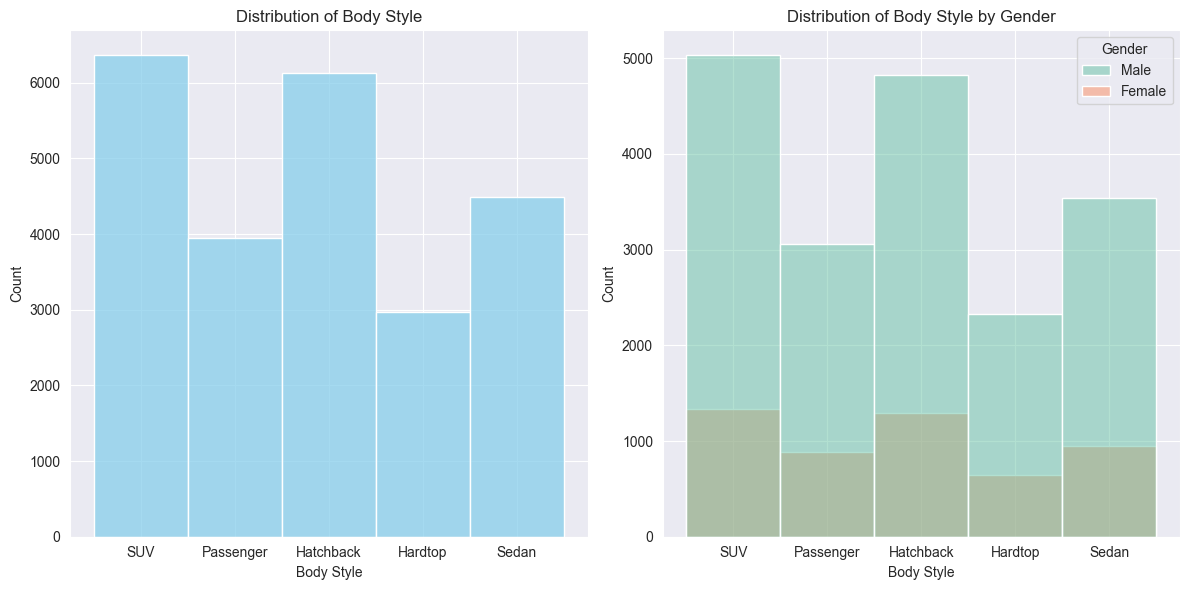

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ 1: Histogram cho 'Body Style' với màu skyblue
plt.subplot(121)
sns.histplot(data=df, x='Body Style', color='skyblue')
plt.title('Distribution of Body Style')

# Biểu đồ 2: Histogram cho 'Body Style' phân biệt theo 'Gender' với màu sắc tùy chỉnh
plt.subplot(122)
sns.histplot(data=df, x='Body Style', hue='Gender', palette='Set2')
plt.title('Distribution of Body Style by Gender')

plt.tight_layout()
plt.show()

# 3.	Thống kê và vẽ biểu đồ cho 1 biến định lượng (giải thích ý nghĩa)

Mean Price: $28090.25
Median Price: $23000.00
Standard Deviation of Price: $14788.69


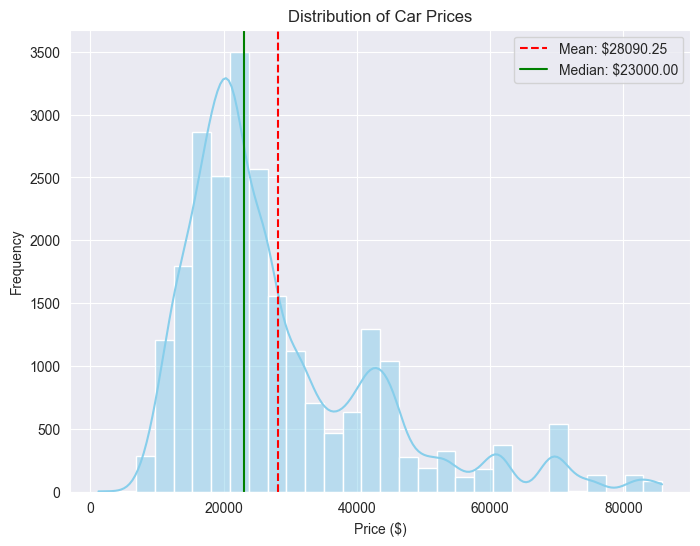

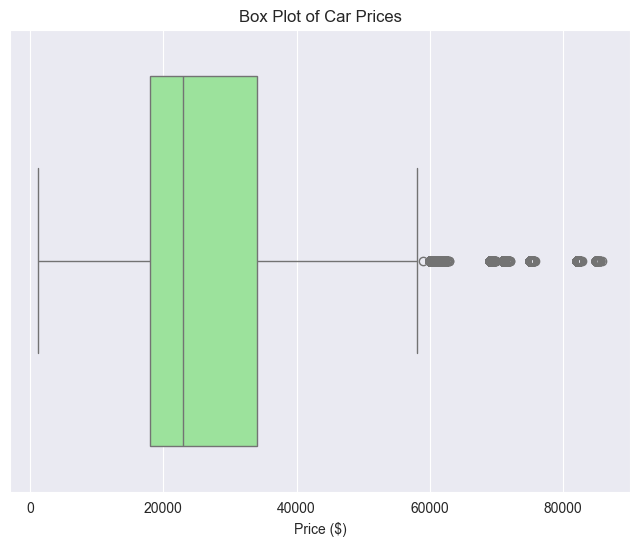

In [8]:
# Thống kê cơ bản cho biến định lượng "Price ($)"
mean_price = df['Price ($)'].mean()
median_price = df['Price ($)'].median()
std_price = df['Price ($)'].std()

print(f"Mean Price: ${mean_price:.2f}")
print(f"Median Price: ${median_price:.2f}")
print(f"Standard Deviation of Price: ${std_price:.2f}")

# Biểu đồ histogram để thể hiện phân bố của "Price ($)"
plt.figure(figsize=(8, 6))
sns.histplot(df['Price ($)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='-', label=f'Median: ${median_price:.2f}')
plt.legend()
plt.show()

# Biểu đồ box plot để xác định các giá trị ngoại lệ trong "Price ($)"
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price ($)'], color='lightgreen')
plt.title('Box Plot of Car Prices')
plt.xlabel('Price ($)')
plt.show()

Thống kê cơ bản:

Mean (Giá trung bình): Tính giá trị trung bình của cột "Price ($)".
Median (Trung vị): Tính trung vị, giá trị ở giữa khi sắp xếp tất cả các giá trị theo thứ tự tăng dần.
Standard Deviation (Độ lệch chuẩn): Đo lường mức độ phân tán của giá trị quanh giá trị trung bình.
Biểu đồ Histogram:

sns.histplot(): Sử dụng để vẽ histogram với bins=30 (chia thành 30 nhóm) và kde=True để vẽ đường cong mật độ.
plt.axvline(): Vẽ các đường thẳng dọc để biểu thị giá trị trung bình và trung vị trên biểu đồ.
Ý nghĩa: Histogram giúp bạn hiểu phân bố của giá, cho thấy phần lớn giá trị nằm ở đâu, có đối xứng không, và có nhiều giá trị thấp hay cao hơn so với trung bình.
Biểu đồ Box Plot:

sns.boxplot(): Sử dụng để vẽ box plot, giúp nhận diện các giá trị ngoại lệ (outliers) và xác định phạm vi của giá trị trong cột "Price ($)".
Ý nghĩa: Box plot giúp xác định các giá trị bất thường trong dữ liệu và cung cấp cái nhìn tổng quát về phạm vi và phân phối của giá cả.

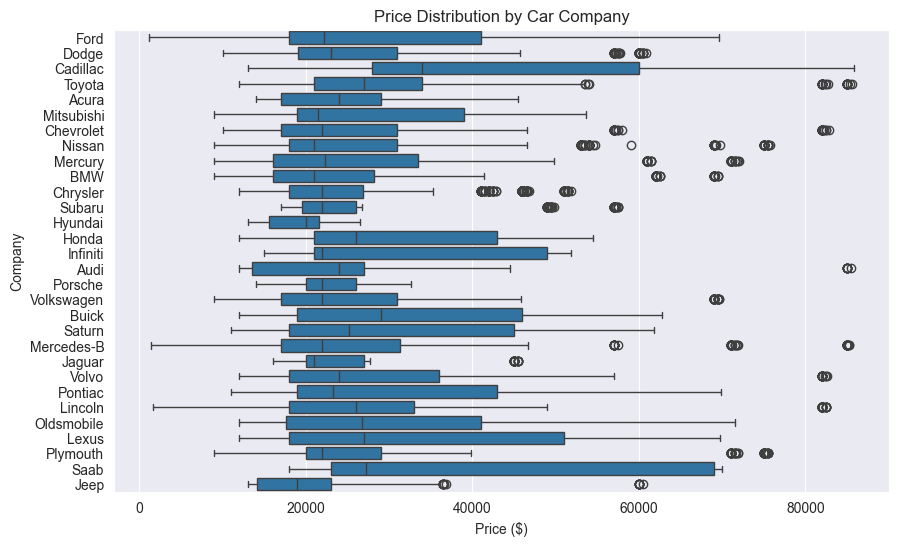

In [10]:

# Price Distribution by Car Company
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price ($)', y='Company', data=df)
plt.title('Price Distribution by Car Company')
plt.xlabel('Price ($)')
plt.ylabel('Company')
plt.show()

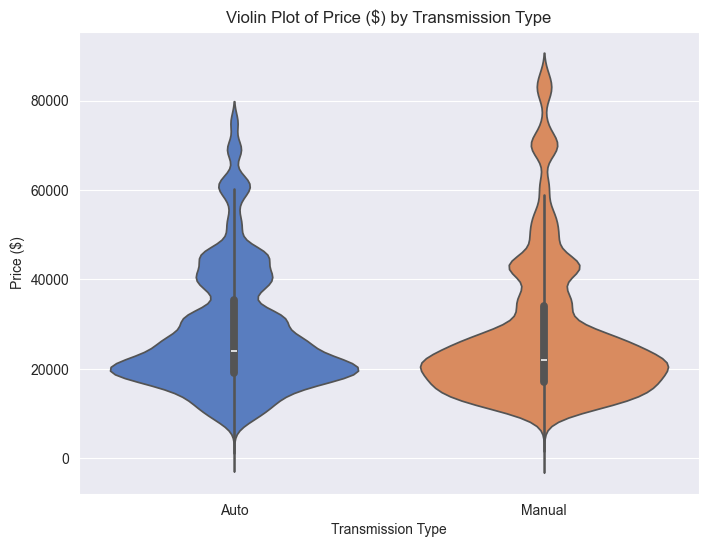

In [12]:
# Vẽ biểu đồ Violin Plot cho biến Price ($) theo biến Transmission
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Transmission', y='Price ($)', palette='muted')
plt.title('Violin Plot of Price ($) by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

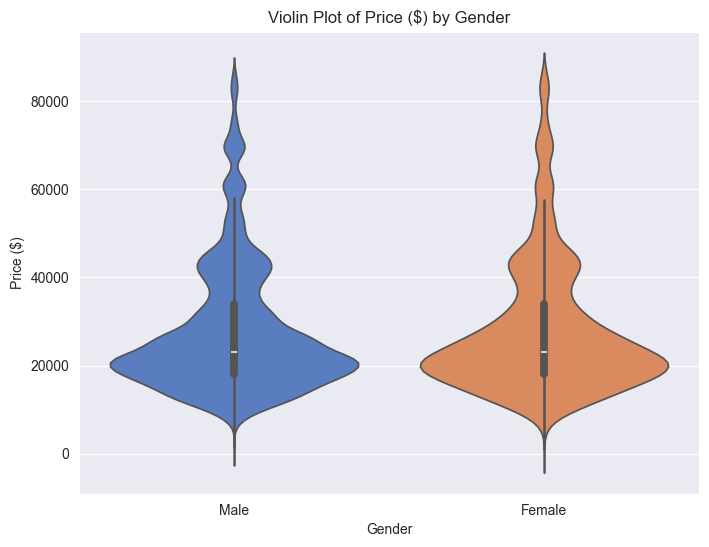

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Gender', y='Price ($)', palette='muted')
plt.title('Violin Plot of Price ($) by Gender')
plt.xlabel('Gender')
plt.ylabel('Price ($)')
plt.show()

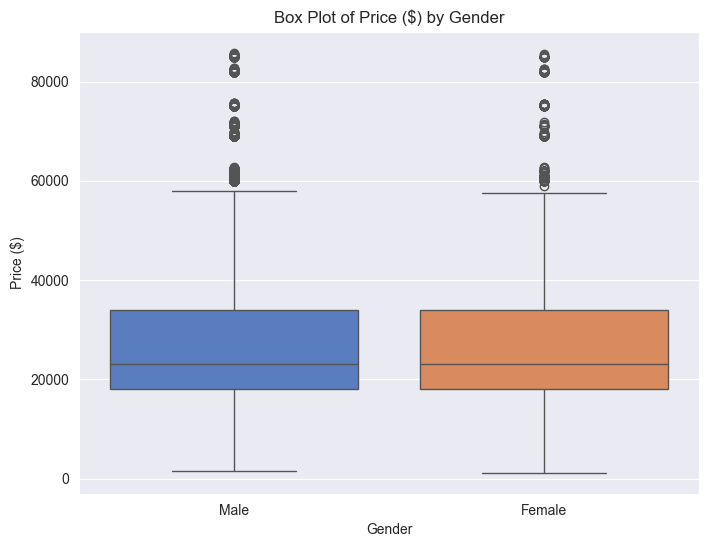

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Price ($)', palette='muted')
plt.title('Box Plot of Price ($) by Gender')
plt.xlabel('Gender')
plt.ylabel('Price ($)')
plt.show()

# 6.	Thống kê và vẽ biểu đồ cho biến thời gian (giải thích ý nghĩa)

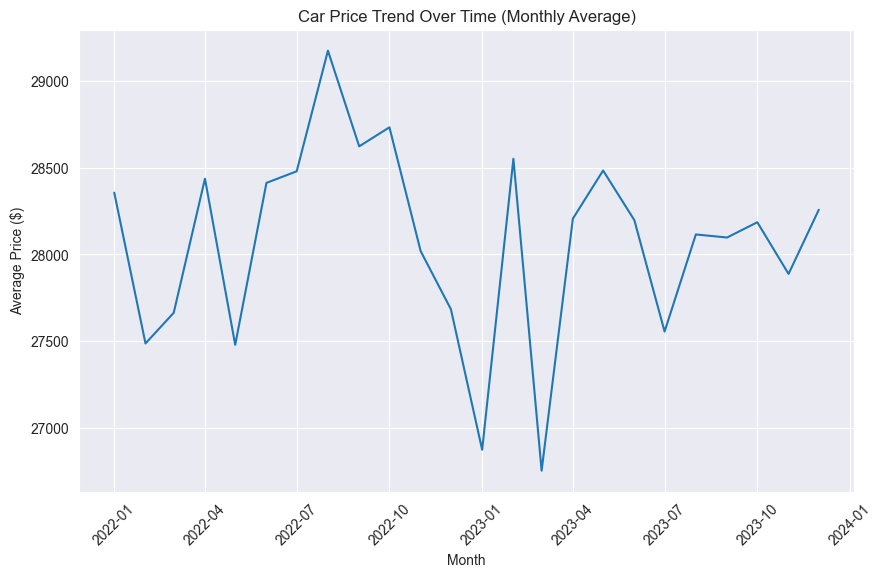

In [13]:
plt.show()
# Grouping data by month and calculating the average price for each month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_price = df.groupby('Month')['Price ($)'].mean().reset_index()
monthly_price['Month'] = monthly_price['Month'].dt.to_timestamp()

# Code for the modified line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Price ($)', data=monthly_price)
plt.title('Car Price Trend Over Time (Monthly Average)')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()